# Project 2 - Energy Services - Diana Bernardo 90384
#  Energy Demand Forecast of Civil Building

## Regression

In [277]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import  metrics
import statsmodels.api as sm

In [278]:
# Import data to train (file from project 1 at the end of feature selection)
df_model = pd.read_csv('Civil_Total_Hourly_Model.csv')
df_model = df_model.set_index('Date')
df_model

,Power (kW),Day type,Weekday,Hour,Temperature (C),Solar Rad (W/m2),Power-1
Date,,,,,,,
2017-01-01 01:00:00,75.173557,1,6,1,7.930000,1.477333,74.897706
2017-01-01 02:00:00,74.208175,1,6,2,7.263417,1.415083,75.173557
2017-01-01 03:00:00,73.735889,1,6,3,6.831333,1.542000,74.208175
2017-01-01 04:00:00,75.102351,1,6,4,6.500250,0.891000,73.735889
2017-01-01 05:00:00,75.787300,1,6,5,6.006417,1.375833,75.102351
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,99.453746,3,0,19,13.361667,1.112333,142.270707
2018-12-31 20:00:00,83.188111,3,0,20,12.810000,1.322417,99.453746
2018-12-31 21:00:00,82.704752,3,0,21,12.565000,1.195500,83.188111


In [279]:
# Import 2019 prepared data
df_2019 = pd.read_csv('clean.csv')
df_2019 = df_2019.set_index('Date')
df_2019

,Power (kWh),Day type,Weekday,Hour,Temperature (C),Solar Rad (W/m2),Power-1
Date,,,,,,,
2019-01-01 01:00:00,94.166,1,1,1,10.377500,1.728667,93.576
2019-01-01 02:00:00,94.725,1,1,2,10.260833,2.674750,94.166
2019-01-01 03:00:00,97.048,1,1,3,9.666667,2.444250,94.725
2019-01-01 04:00:00,95.032,1,1,4,8.640833,3.056333,97.048
2019-01-01 05:00:00,96.062,1,1,5,9.093333,2.426417,95.032
...,...,...,...,...,...,...,...
2019-03-31 19:00:00,107.445,1,6,19,14.616667,4.017500,105.657
2019-03-31 20:00:00,107.570,1,6,20,14.734167,3.004167,107.445
2019-03-31 21:00:00,105.740,1,6,21,14.730000,4.528917,107.570


### Split Data into training and test data

In [280]:
# Create vector with inputs and outputs
# Create matrix from data frame
Z=df_model.values
#Identify output Y
Y=Z[:,0]
#Identify input Y
X=Z[:,[1,2,3,4,5,6]] 

In [281]:
# Generate training data for model training and test data for model evaluation
# By default, it chooses randomly 75% of the data for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X,Y)
print(X_train)
print(y_train) 

[[3.00000000e+00 0.00000000e+00 1.20000000e+01 1.10675000e+01
  4.83575000e+02 3.74359482e+02]
 [0.00000000e+00 2.00000000e+00 1.80000000e+01 1.39959497e+01
  1.64076941e+00 3.66651131e+02]
 [1.00000000e+00 6.00000000e+00 1.10000000e+01 1.85991667e+01
  6.91316667e+02 8.40683511e+01]
 ...
 [0.00000000e+00 2.00000000e+00 4.00000000e+00 1.86041667e+01
  1.31333333e-01 9.88485927e+01]
 [0.00000000e+00 3.00000000e+00 1.00000000e+01 1.15316667e+01
  1.69446667e+02 3.82935473e+02]
 [0.00000000e+00 2.00000000e+00 6.00000000e+00 1.14883333e+01
  1.13091667e+00 8.97964965e+01]]
[375.9729684 322.1595947  88.2368435 ...  98.004242  421.7372345
  97.404816 ]


### Data to predict

In [282]:
# Data one wants to predict
Z2=df_2019.values
# Identify output Y2
Y2=Z2[:,0]
# Identify input X2
X2=Z2[:,[1,2,3,4,5,6]] 

### Linear Regression

In [283]:
# Import libraries
from sklearn import  linear_model

In [284]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train,y_train)
# Make predictions using the testing set
y_pred_LR = regr.predict(X_test)

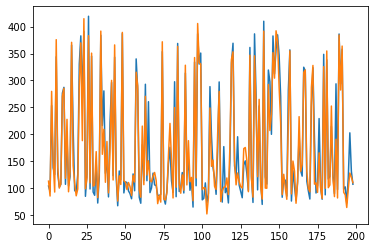

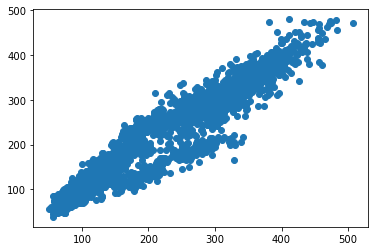

In [285]:
plt.plot(y_test[1:200])
# Overimpose the predicted set on the tested set
plt.plot(y_pred_LR[1:200]) 
plt.show()
# Scatter plot showing a relation between the predicted and tested values - the more linear the better
plt.scatter(y_test,y_pred_LR) 

In [286]:
# Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(y_test)
print(MAE_LR, MSE_LR, RMSE_LR,cvRMSE_LR)
LR_errors = np.array([MAE_LR, MSE_LR, RMSE_LR,cvRMSE_LR]) 

17.912314157763788 656.4334384298196 25.620957016275163 0.1463923365027427


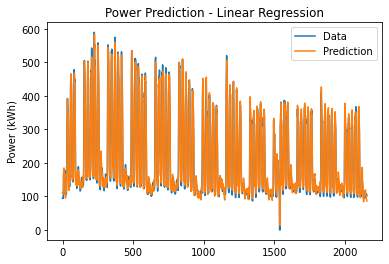

In [287]:
# 2019 data prediction
y2_pred_LR = regr.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_LR, label='Prediction')
plt.legend()
plt.ylabel('Power (kWh)')
plt.title('Power Prediction - Linear Regression')
plt.show()

Text(0, 0.5, 'Power Prediction (kWh)')

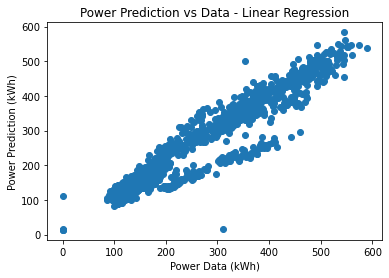

In [288]:
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_LR)
plt.title('Power Prediction vs Data - Linear Regression')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [289]:
# Evaluate errors from 2019 data prediction
MAE_LR=metrics.mean_absolute_error(Y2,y2_pred_LR) 
MSE_LR=metrics.mean_squared_error(Y2,y2_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(Y2)
print(MAE_LR, MSE_LR, RMSE_LR,cvRMSE_LR)
LR_errors2 = np.array([MAE_LR, MSE_LR, RMSE_LR,cvRMSE_LR]) 

20.914434148609878 1058.1955775295717 32.529918191252364 0.1495620086766331


### Support Vector Regressor 

In [290]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [291]:
ss_X = StandardScaler()
ss_y = StandardScaler()
X_train_ss = ss_X.fit_transform(X_train)
y_train_ss = ss_y.fit_transform(y_train.reshape(-1,1))

In [292]:
regr = SVR(kernel='rbf')
regr.fit(X_train_ss,y_train_ss)

C:\Users\Diana Sofia\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

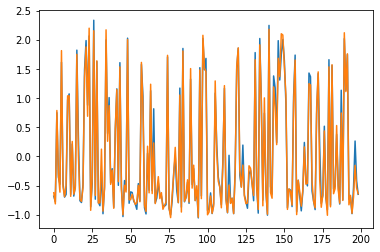

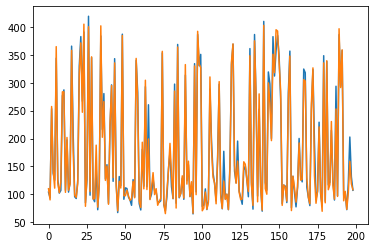

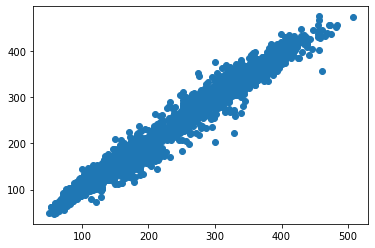

In [293]:
y_pred_SVR = regr.predict(ss_X.fit_transform(X_test))
y_test_SVR=ss_y.fit_transform(y_test.reshape(-1,1)) # It is just one column we have to reshape, otherwise its a line
y_pred_SVR2=ss_y.inverse_transform(y_pred_SVR)

plt.plot(y_test_SVR[1:200])
plt.plot(y_pred_SVR[1:200])
plt.show()
plt.plot(y_test[1:200])
plt.plot(y_pred_SVR2[1:200])
plt.show()
plt.scatter(y_test, y_pred_SVR2)

In [294]:
# Evaluate errors
MAE_SVR=metrics.mean_absolute_error(y_test,y_pred_SVR2) 
MSE_SVR=metrics.mean_squared_error(y_test,y_pred_SVR2)  
RMSE_SVR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_SVR2))
cvRMSE_SVR=RMSE_SVR/np.mean(y_test)
print(MAE_SVR, MSE_SVR, RMSE_SVR,cvRMSE_SVR)
SVR_errors = np.array([MAE_SVR, MSE_SVR, RMSE_SVR,cvRMSE_SVR])

9.480204127869305 199.6256759299033 14.128895071091133 0.08072930142091231


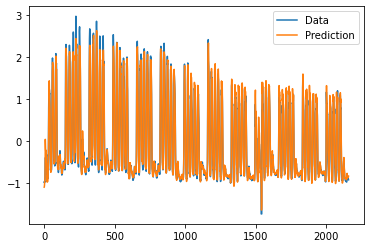

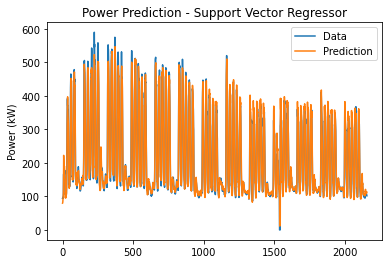

Text(0, 0.5, 'Power Prediction (kWh)')

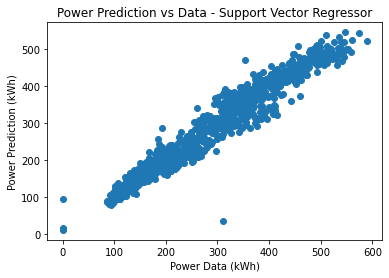

In [295]:
# 2019 data prediction
y2_pred_SVR = regr.predict(ss_X.fit_transform(X2))
Y2_SVR=ss_y.fit_transform(Y2.reshape(-1,1)) # It is just one column we have to reshape, otherwise its a line
y2_pred_SVR2=ss_y.inverse_transform(y2_pred_SVR)

plt.plot(Y2_SVR, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_SVR, label='Prediction')
plt.legend()
plt.show()

plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_SVR2, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Support Vector Regressor')
plt.show()

# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_SVR2)
plt.title('Power Prediction vs Data - Support Vector Regressor')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [296]:
# Evaluate errors from 2019 data prediction
MAE_SVR=metrics.mean_absolute_error(Y2,y2_pred_SVR2) 
MSE_SVR=metrics.mean_squared_error(Y2,y2_pred_SVR2)  
RMSE_SVR= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_SVR2))
cvRMSE_SVR=RMSE_SVR/np.mean(Y2)
print(MAE_SVR, MSE_SVR, RMSE_SVR,cvRMSE_SVR)
SVR_errors2 = np.array([MAE_SVR, MSE_SVR, RMSE_SVR,cvRMSE_SVR]) 

13.302208379162764 425.6724369659747 20.631830674130075 0.09485846291273042


### Decision Tree Regressor

In [297]:
# Import libraries
from sklearn.tree import DecisionTreeRegressor

In [298]:
# Create Regression Decision Tree object
DT_regr_model = DecisionTreeRegressor()

# Train the model using the training sets
DT_regr_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_DT = DT_regr_model.predict(X_test)

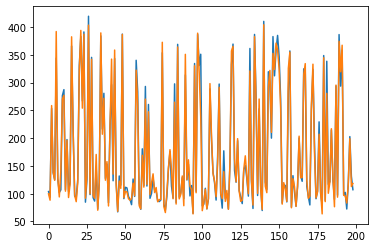

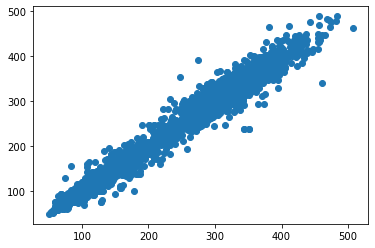

In [299]:
plt.plot(y_test[1:200])
plt.plot(y_pred_DT[1:200])
plt.show()
plt.scatter(y_test,y_pred_DT)

In [300]:
# Evaluate errors
MAE_DT=metrics.mean_absolute_error(y_test,y_pred_DT) 
MSE_DT=metrics.mean_squared_error(y_test,y_pred_DT)  
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))
cvRMSE_DT=RMSE_DT/np.mean(y_test)
print(MAE_DT, MSE_DT, RMSE_DT,cvRMSE_DT)
DTR_errors = np.array([MAE_DT, MSE_DT, RMSE_DT,cvRMSE_DT])

8.950930450878795 206.12572321685224 14.357079202151537 0.08203309378423275


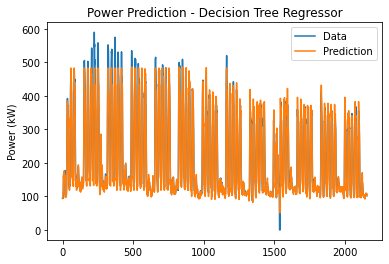

Text(0, 0.5, 'Power Prediction (kWh)')

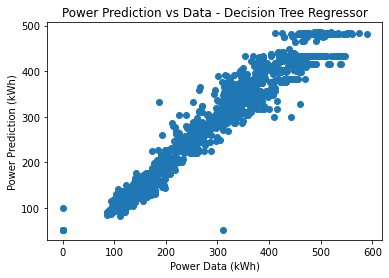

In [301]:
# Make predictions using the testing set
y2_pred_DT = DT_regr_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_DT, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Decision Tree Regressor')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_DT) 
plt.title('Power Prediction vs Data - Decision Tree Regressor')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [302]:
# Evaluate errors from 2019 data prediction
MAE_DT=metrics.mean_absolute_error(Y2,y2_pred_DT) 
MSE_DT=metrics.mean_squared_error(Y2,y2_pred_DT)  
RMSE_DT= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_DT))
cvRMSE_DT=RMSE_DT/np.mean(Y2)
print(MAE_DT, MSE_DT, RMSE_DT,cvRMSE_DT)
DTR_errors2 = np.array([MAE_DT, MSE_DT, RMSE_DT,cvRMSE_DT])

15.73273883811726 627.2448152345906 25.044856063363405 0.11514812173308996


### Random forest  

In [303]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor

In [304]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

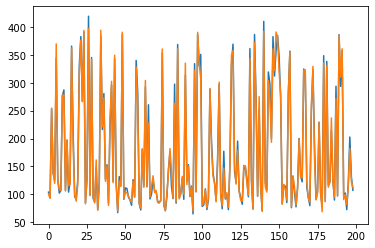

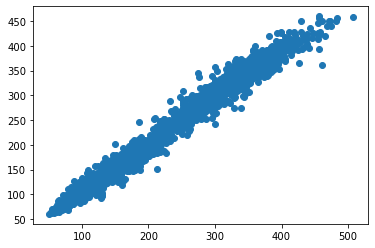

In [305]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

In [306]:
# Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
print(MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF)
RF_errors = np.array([MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF])

7.355404321845669 127.09897543952633 11.273818139367263 0.06441603948207693


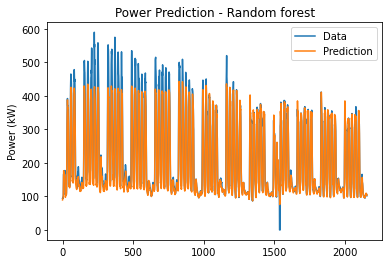

Text(0, 0.5, 'Power Prediction (kWh)')

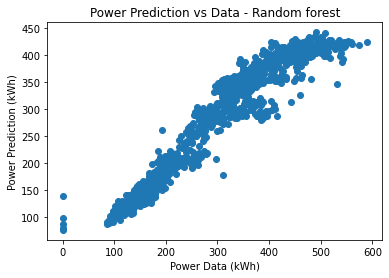

In [307]:
# Make predictions using the testing set
y2_pred_RF = RF_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_RF, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Random forest')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_RF) 
plt.title('Power Prediction vs Data - Random forest')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [308]:
# Evaluate errors from 2019 data prediction
MAE_RF=metrics.mean_absolute_error(Y2,y2_pred_RF) 
MSE_RF=metrics.mean_squared_error(Y2,y2_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(Y2)
print(MAE_RF, MSE_RF, RMSE_RF,cvRMSE_RF)
RF_errors2 = np.array([MAE_RF, MSE_RF, RMSE_RF,cvRMSE_RF])

18.470094399329845 978.3487369580691 31.27856673439608 0.14380870071110047


### Random forest uniformized data

In [309]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [310]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 100, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(X_train_scaled, y_train.reshape(-1,1))
y_pred_RF = RF_model.predict(X_test_scaled)

C:\Users\DIANAS~1\AppData\Local\Temp/ipykernel_6780/1024093714.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train_scaled, y_train.reshape(-1,1))


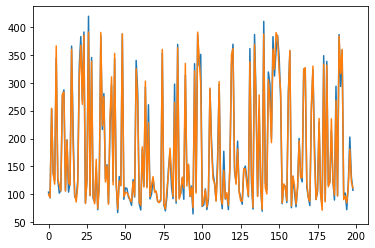

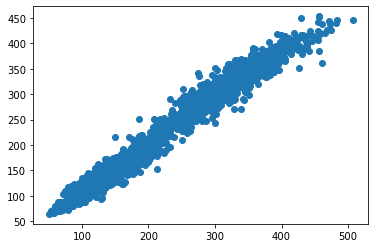

In [311]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

In [312]:
# Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
print(MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF)
RF_unif_errors = np.array([MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF])

8.56352916680024 161.27658897258428 12.699471995818735 0.07256190222083027


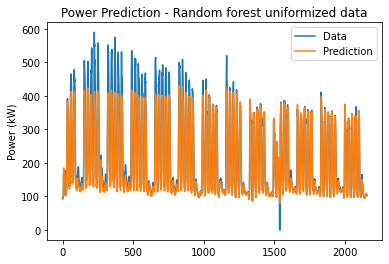

Text(0, 0.5, 'Power Prediction (kWh)')

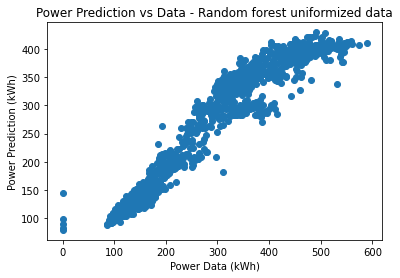

In [313]:
X2_scaled = scaler.transform(X2)
# Make predictions using the testing set
y2_pred_RF_unif = RF_model.predict(X2_scaled)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_RF_unif, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Random forest uniformized data')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_RF_unif)
plt.title('Power Prediction vs Data - Random forest uniformized data')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [314]:
# Evaluate errors from 2019 data prediction
MAE_RF=metrics.mean_absolute_error(Y2,y2_pred_RF_unif) 
MSE_RF=metrics.mean_squared_error(Y2,y2_pred_RF_unif)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_RF_unif))
cvRMSE_RF=RMSE_RF/np.mean(Y2)
print(MAE_RF, MSE_RF, RMSE_RF,cvRMSE_RF)
RF_unif_errors2 = np.array([MAE_RF, MSE_RF, RMSE_RF,cvRMSE_RF])

21.06642407317762 1233.8578928491313 35.12631339678463 0.1614993913646169


### Gradient Boosting

In [315]:
# Import libraries
from sklearn.ensemble import GradientBoostingRegressor

In [316]:
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB =GB_model.predict(X_test)

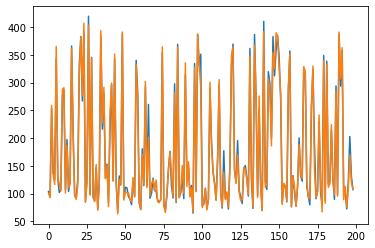

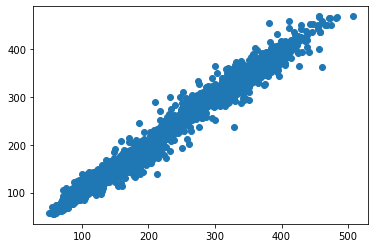

In [317]:
plt.plot(y_test[1:200])
plt.plot(y_pred_GB[1:200])
plt.show()
plt.scatter(y_test,y_pred_GB)

In [318]:
# Evaluate errors
MAE_GB=metrics.mean_absolute_error(y_test,y_pred_GB) 
MSE_GB=metrics.mean_squared_error(y_test,y_pred_GB)  
RMSE_GB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_GB))
cvRMSE_GB=RMSE_GB/np.mean(y_test)
print(MAE_GB,MSE_GB,RMSE_GB,cvRMSE_GB)
GB_errors = np.array([MAE_GB,MSE_GB,RMSE_GB,cvRMSE_GB])

8.049433862890027 148.58873340510158 12.189697838958175 0.06964916832630291


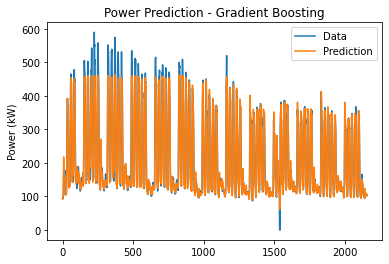

Text(0, 0.5, 'Power Prediction (kWh)')

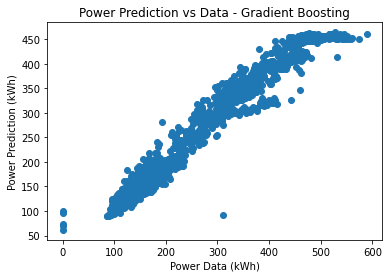

In [319]:
# Make predictions using the testing set
y2_pred_GB = GB_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_GB, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Gradient Boosting')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_GB) 
plt.title('Power Prediction vs Data - Gradient Boosting')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [320]:
# Evaluate errors from 2019 data prediction
MAE_GB=metrics.mean_absolute_error(Y2,y2_pred_GB) 
MSE_GB=metrics.mean_squared_error(Y2,y2_pred_GB)  
RMSE_GB= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_GB))
cvRMSE_GB=RMSE_GB/np.mean(Y2)
print(MAE_GB, MSE_GB, RMSE_GB,cvRMSE_GB)
GB_errors2 = np.array([MAE_GB, MSE_GB, RMSE_GB,cvRMSE_GB])

14.556709400389856 531.353769613279 23.051112112288184 0.1059815339674348


### Extreme Gradient Boosting

In [321]:
# Import libraries
from xgboost import XGBRegressor

In [322]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)
y_pred_XGB =XGB_model.predict(X_test)

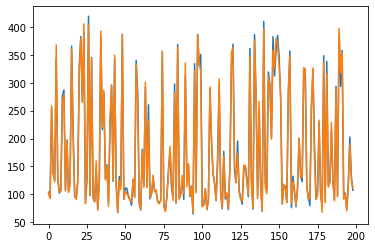

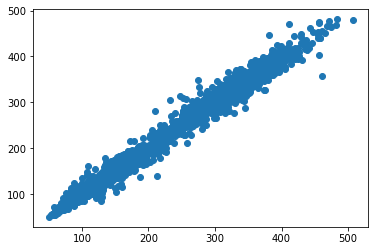

In [323]:
plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [324]:
# Evaluate errors
MAE_XGB=metrics.mean_absolute_error(y_test,y_pred_XGB) 
MSE_XGB=metrics.mean_squared_error(y_test,y_pred_XGB)  
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_XGB))
cvRMSE_XGB=RMSE_XGB/np.mean(y_test)
print(MAE_XGB,MSE_XGB,RMSE_XGB,cvRMSE_XGB)
EGB_errors = np.array([MAE_XGB,MSE_XGB,RMSE_XGB,cvRMSE_XGB])

6.828428679505183 112.11696068265847 10.588529675203185 0.060500456649490754


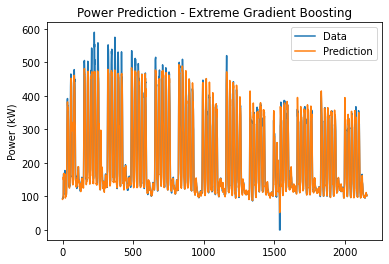

Text(0, 0.5, 'Power Prediction (kWh)')

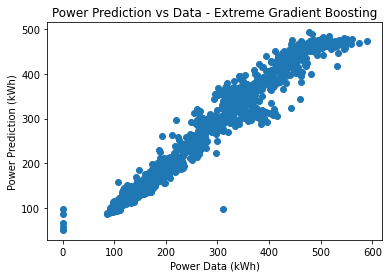

In [325]:
# Make predictions using the testing set
y2_pred_XGB = XGB_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_XGB, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Extreme Gradient Boosting')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_XGB) 
plt.title('Power Prediction vs Data - Extreme Gradient Boosting')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [326]:
# Evaluate errors from 2019 data prediction
MAE_XGB=metrics.mean_absolute_error(Y2,y2_pred_XGB) 
MSE_XGB=metrics.mean_squared_error(Y2,y2_pred_XGB)  
RMSE_XGB= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_XGB))
cvRMSE_XGB=RMSE_XGB/np.mean(Y2)
print(MAE_XGB, MSE_XGB, RMSE_XGB,cvRMSE_XGB)
EGB_errors2 = np.array([MAE_XGB, MSE_XGB, RMSE_XGB,cvRMSE_XGB])

13.372610090791351 488.4059596377098 22.099908588899407 0.10160820880928631


### Bootstrapping 

In [327]:
# Import libraries
from sklearn.ensemble import BaggingRegressor

In [328]:
BT_model = BaggingRegressor()
BT_model.fit(X_train, y_train)
y_pred_BT =BT_model.predict(X_test)

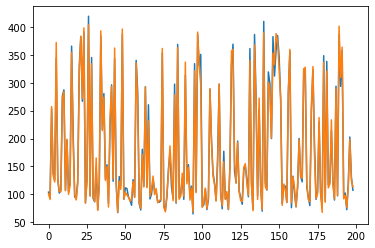

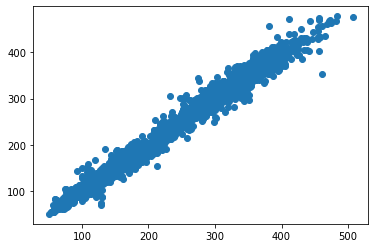

In [329]:
plt.plot(y_test[1:200])
plt.plot(y_pred_BT[1:200])
plt.show()
plt.scatter(y_test,y_pred_BT)

In [330]:
# Evaluate errors
MAE_BT=metrics.mean_absolute_error(y_test,y_pred_BT) 
MSE_BT=metrics.mean_squared_error(y_test,y_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(y_test)
print(MAE_BT,MSE_BT,RMSE_BT,cvRMSE_BT)
B_errors = np.array([MAE_BT,MSE_BT,RMSE_BT,cvRMSE_BT])

7.007812779047741 119.19728270625232 10.917750808030577 0.062381551521554536


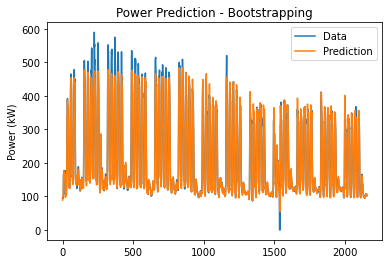

Text(0, 0.5, 'Power Prediction (kWh)')

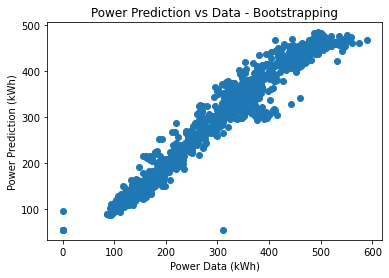

In [331]:
# Make predictions using the testing set
y2_pred_BT = BT_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_BT, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Bootstrapping')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_BT)  
plt.title('Power Prediction vs Data - Bootstrapping')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [332]:
# Evaluate errors from 2019 data prediction
MAE_BT=metrics.mean_absolute_error(Y2,y2_pred_BT) 
MSE_BT=metrics.mean_squared_error(Y2,y2_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(Y2)
print(MAE_BT, MSE_BT, RMSE_BT,cvRMSE_BT)
B_errors2 = np.array([MAE_BT, MSE_BT, RMSE_BT,cvRMSE_BT])

13.451279176881897 501.83122022518245 22.401589680761106 0.10299524058149435


### Neural Networks

In [333]:
# Import libraries
from sklearn.neural_network import MLPRegressor

In [334]:
NN_model = MLPRegressor(hidden_layer_sizes=(10,10,10,10))
NN_model.fit(X_train,y_train)
y_pred_NN = NN_model.predict(X_test)

C:\Users\Diana Sofia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


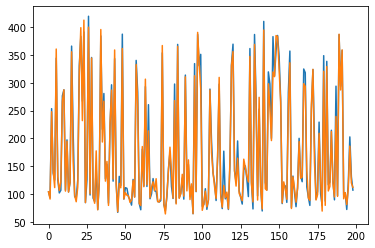

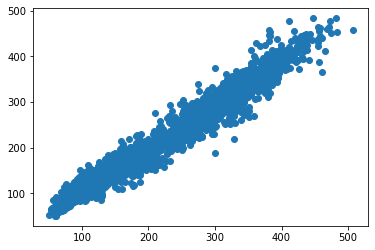

In [335]:
plt.plot(y_test[1:200])
plt.plot(y_pred_NN[1:200])
plt.show()
plt.scatter(y_test,y_pred_NN)

In [336]:
# Evaluate errors
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
cvRMSE_NN=RMSE_NN/np.mean(y_test)
print(MAE_NN,MSE_NN,RMSE_NN,cvRMSE_NN)
NN_errors = np.array([MAE_NN,MSE_NN,RMSE_NN,cvRMSE_NN])

11.019014361928836 272.5764646746062 16.509889904981385 0.09433376579407132


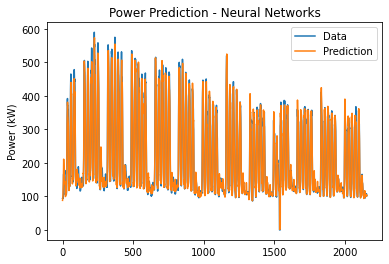

Text(0, 0.5, 'Power Prediction (kWh)')

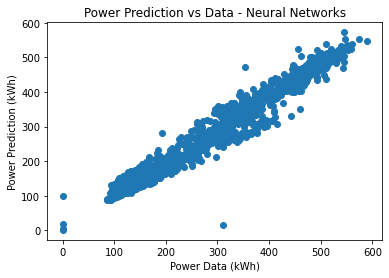

In [337]:
# Make predictions using the testing set
y2_pred_NN = NN_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_NN, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Neural Networks')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_NN) 
plt.title('Power Prediction vs Data - Neural Networks')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [338]:
# Evaluate errors from 2019 data prediction
MAE_NN=metrics.mean_absolute_error(Y2,y2_pred_NN) 
MSE_NN=metrics.mean_squared_error(Y2,y2_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_NN))
cvRMSE_NN=RMSE_NN/np.mean(Y2)
print(MAE_NN, MSE_NN, RMSE_NN,cvRMSE_NN)
NN_errors2 = np.array([MAE_NN, MSE_NN, RMSE_NN,cvRMSE_NN])

14.396208819600806 495.3389888352197 22.256212364982943 0.10232684285494717


### Comparison between methods

In [339]:
df_pred=pd.DataFrame(data=[Y2,y2_pred_LR,y2_pred_SVR2,y2_pred_DT,y2_pred_RF,y2_pred_RF_unif,y2_pred_GB,y2_pred_XGB,y2_pred_BT,y2_pred_NN]).T
df_pred.rename(columns = {0:'data',1:'LR',2:'SVR',3:'DT',4:'RF',5:'RF_unif',6:'GB',7:'XGB',8:'BT',9:'NN'}, inplace = True)
df_model2 = pd.read_csv('clean.csv')
df_pred = df_pred.reset_index() 
df_pred['Date']=df_model2['Date']
df_pred = df_pred.drop(columns = ['index']) 
df_pred = df_pred.set_index('Date')
df_pred.to_csv('df_pred.csv', encoding='utf-8', index=True)
df_pred

,data,LR,SVR,DT,RF,RF_unif,GB,XGB,BT,NN
Date,,,,,,,,,,
2019-01-01 01:00:00,94.166,111.292765,79.830629,95.659990,89.544637,91.450111,91.258883,91.287003,88.825274,88.130676
2019-01-01 02:00:00,94.725,110.780440,80.948382,94.002024,90.846550,91.951726,94.206870,92.314857,91.810453,90.949315
2019-01-01 03:00:00,97.048,110.648124,84.097367,93.784588,91.279619,92.435444,94.496335,92.418892,92.642567,93.352166
2019-01-01 04:00:00,95.032,112.629740,92.003488,95.318661,94.360363,94.927406,97.212871,94.774788,97.431217,106.786672
2019-01-01 05:00:00,96.062,109.047432,94.952529,114.303093,96.646950,97.352036,100.848587,100.998695,101.473143,116.365920
...,...,...,...,...,...,...,...,...,...,...
2019-03-31 19:00:00,107.445,91.720221,109.606468,102.998950,104.089734,105.271965,103.111680,102.294136,103.441456,102.514319
2019-03-31 20:00:00,107.570,92.054513,110.447859,103.402512,105.775928,107.174763,105.475981,103.179321,104.902814,104.014818
2019-03-31 21:00:00,105.740,91.014770,110.697372,103.402512,106.394136,107.412528,105.830847,103.526665,105.794642,104.420688


In [340]:
df_errors=pd.DataFrame(data=[LR_errors2,SVR_errors2,DTR_errors2,RF_errors2,RF_unif_errors2,GB_errors2,EGB_errors2,B_errors2,NN_errors2])
df_errors.rename(columns = {0:'MAE',1:'MSE',2:'RMSE',3:'cvRMSE'}, inplace = True)
df_errors = df_errors.set_index('MAE')
df_errors.to_csv('df_errors.csv', encoding='utf-8', index=True)
df_errors

,MSE,RMSE,cvRMSE
MAE,,,
20.914434,1058.195578,32.529918,0.149562
13.302208,425.672437,20.631831,0.094858
15.732739,627.244815,25.044856,0.115148
18.470094,978.348737,31.278567,0.143809
21.066424,1233.857893,35.126313,0.161499
14.556709,531.353770,23.051112,0.105982
13.372610,488.405960,22.099909,0.101608
13.451279,501.831220,22.401590,0.102995
14.396209,495.338989,22.256212,0.102327


In [341]:
df_errors= df_errors.reset_index() 
new_col=['Linear Regression','Support Vector Regressor','Decision Tree Regressor','Random Forest','Random Forest Uniformized Data','Gradient Boosting','Extreme Gradient Boosting','Bootstrapping','Neural Networks']
df_errors.insert(loc=0, column='Forecasting Method', value=new_col)
df_errors = df_errors.set_index('Forecasting Method')
df_errors.to_csv('df_errors2.csv', encoding='utf-8', index=True)
df_errors

,MAE,MSE,RMSE,cvRMSE
Forecasting Method,,,,
Linear Regression,20.914434,1058.195578,32.529918,0.149562
Support Vector Regressor,13.302208,425.672437,20.631831,0.094858
Decision Tree Regressor,15.732739,627.244815,25.044856,0.115148
Random Forest,18.470094,978.348737,31.278567,0.143809
Random Forest Uniformized Data,21.066424,1233.857893,35.126313,0.161499
Gradient Boosting,14.556709,531.353770,23.051112,0.105982
Extreme Gradient Boosting,13.372610,488.405960,22.099909,0.101608
Bootstrapping,13.451279,501.831220,22.401590,0.102995
Neural Networks,14.396209,495.338989,22.256212,0.102327


In [342]:
# Print errors for 2019 data
print('Linear Regression', LR_errors2)
print('Support Vector Regressor', SVR_errors2)
print('Decision Tree Regressor', DTR_errors2)
print('Random forest', RF_errors2)
print('Random forest uniformized data', RF_unif_errors2)
print('Gradient Boosting', GB_errors2)
print('Extreme Gradient Boosting', EGB_errors2)
print('Bootstrapping', B_errors2)
print('Neural Networks', NN_errors2)

Linear Regression [2.09144341e+01 1.05819558e+03 3.25299182e+01 1.49562009e-01]
Support Vector Regressor [1.33022084e+01 4.25672437e+02 2.06318307e+01 9.48584629e-02]
Decision Tree Regressor [1.57327388e+01 6.27244815e+02 2.50448561e+01 1.15148122e-01]
Random forest [1.84700944e+01 9.78348737e+02 3.12785667e+01 1.43808701e-01]
Random forest uniformized data [2.10664241e+01 1.23385789e+03 3.51263134e+01 1.61499391e-01]
Gradient Boosting [1.45567094e+01 5.31353770e+02 2.30511121e+01 1.05981534e-01]
Extreme Gradient Boosting [1.33726101e+01 4.88405960e+02 2.20999086e+01 1.01608209e-01]
Bootstrapping [1.34512792e+01 5.01831220e+02 2.24015897e+01 1.02995241e-01]
Neural Networks [1.43962088e+01 4.95338989e+02 2.22562124e+01 1.02326843e-01]
